In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
from IPython.display import Image

#### Q.1.
##### Bernoulli distribution is the discrete probability distribution of a random variable which takes the value 1 with probability p and the value 0 with probability q = 1 − p. A binomial random variable is random variable that represents the number of successes in n successive independent trials of a Bernoulli experiment. E.g. The number of heads in n coin flips. If X is a Binomial random variable, we denote this X ∼ B(n, p), where p is the probability of success in a given trial. The probability distribution of a random variable X which assumes integral values k = 0, . . . , n with the probabilities:
$$ P_{r}(X = k) = {n\choose x}p^{k} (1-p)^{n-k}  $$         
##### if k ∈ N, 0 ≤ k ≤ n 
##### Assume that some messages being transmitted over a network, there is a probability that the bits will be corrupted. A Hamming code allows for a 4 bit code to be encoded as 7 bits, with the advantage that if 0 or 1 bit(s) are corrupted, then the message can be perfectly reconstructed. You are working on a system where the probability of any bit being lost is 0.1. How does reliability change when using a Hamming code?

##### Plot the probability of using error-correcting codes and the probability of without using error-correcting codes.


In [3]:
# Function to calculate bernoulli distribution

def bino_dist(n,p,k):
    return math.comb(n,k)*np.power(p,k)*np.power((1-p),(n-k))

In [4]:
# Case: Without using error correcting codes
# The code can be perfectly reconstructed if no bits are lost. Hence k=0
# SInce we have 4 bits code and no bits has to be lost. Hence, n=4, k=0 and p=0.1

q1_error = bino_dist(4,0.1,0)
print(f'The probability of a message being perfectly reconstructed without using error correcting code is: {q1_error}')

# Case: With error correcting codes
# The codes can be perfectly reconstructed if 0 bits or 1 bits is lost. Hence k=[0,1]
# Since now we have 7 bits codes (using Hamming code). Hence n=7, k=0,1 and p=0.1

q1_error_hamm = bino_dist(7,0.1,0) + bino_dist(7,0.1,1)
print(f'The probability of a message being perfectly reconstructed with using error correcting code is: {q1_error_hamm}')

q1_reliability = (q1_error_hamm-q1_error)/q1_error*100
print(f'The reliability of the system is increased by {q1_reliability}%')

The probability of a message being perfectly reconstructed without using error correcting code is: 0.6561
The probability of a message being perfectly reconstructed with using error correcting code is: 0.8503056000000002
The reliability of the system is increased by 29.600000000000033%


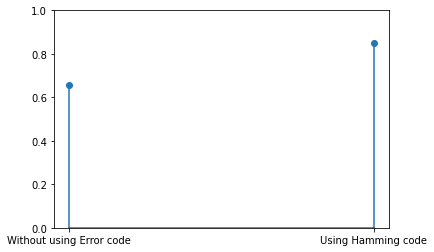

In [5]:
q1_xlabel=['Without using Error code','Using Hamming code']
plt.stem(q1_xlabel,[q1_error,q1_error_hamm])
plt.ylim(0,1)
plt.show()

### Q.2.
#### Let $X_{1}, X_{2},..., X_{100},$ be independent and uniformly distributed random variables over [0, 1] and Y = $\sum_{1}^{100}  X_{i}$
#### Generate the probability density function (PDF) of Y .

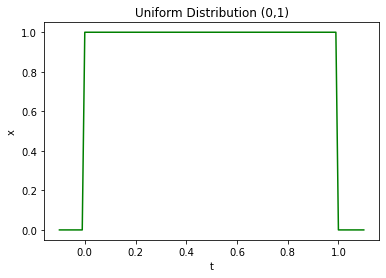

In [6]:
# Defining x-axis to be between -0.1 and 1.1 in steps of 0.01

q2_n = np.linspace(-0.1,1.1,121)

# Defining uniform distribution between 0 and 1
q2_xi = np.zeros(len(q2_n))

for i,n in enumerate(q2_n):
    if n>=0 and n<1:
        q2_xi[i] = 1

plt.plot(q2_n,q2_xi,color='green')
plt.title('Uniform Distribution (0,1)')
plt.xlabel('t')
plt.ylabel('x')
plt.show()

In [7]:
# Summation of Random variables involves convolution operation
# Example: If Y=X1+X2 , then pdf of Y is convolution of pdf of X1 and X2

q2_y = np.convolve(q2_xi/100,q2_xi/100)
 
for i in range(1,99):
    temp = np.convolve(q2_y,q2_xi/100)
    q2_y = temp


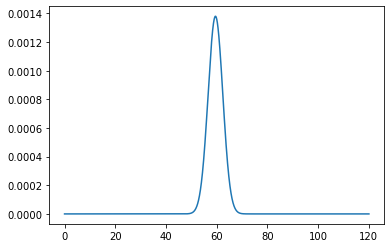

In [8]:
plt.plot(np.linspace(0,120,12001),q2_y)
plt.show()

# This shows the distribution of sum of uniform random variables resembles a Gaussian distibution with mean = 50 and 
# standard deviation = 2.886

### Q.3.
#### The autocorrelation sequence of a random process can be estimated from a finite number of samples, e.g. x(n) for n = 0, 1, . . . , N − 1. The autocorrelation may be estimated using the sample autocorrelation as:
$$ \hat r_{x}(k) = \frac{1}{N} \sum_{n=0}^{N-1} x(n) x^{\ast}(n-k)$$
#### Since x(n) is only given for values of n within the interval [0, N − 1], in evaluating this sum, x(n) is assumed to be equal to zero for values of n that are outside the interval [0, N − 1].
#### With x(n) = 1 for n = 0, 1, . . . , 7; plot the input sequence and the sample autocorrelation sequence ˆrx (each must be on a subplot).

In [9]:
# Given size of x(n) = 8

q3_N = 8
q3_x = np.ones(q3_N)

# Function to find autocorrelation 

def auto_corr(x,k):
    N = len(x)
    auto_r = []
    auto_r.append(np.dot(x,x)/N)
    
    for i in range(1,k):
        temp = np.dot(x[i:],x[:-1*i])/N
        auto_r.append(temp)
    
    return auto_r

In [10]:
# Calculating autocorrelation function for k=0,1,2,3,4,5,6,7

q3_auto_sample=auto_corr(q3_x,8)
    
q3_auto_sample

[1.0, 0.875, 0.75, 0.625, 0.5, 0.375, 0.25, 0.125]

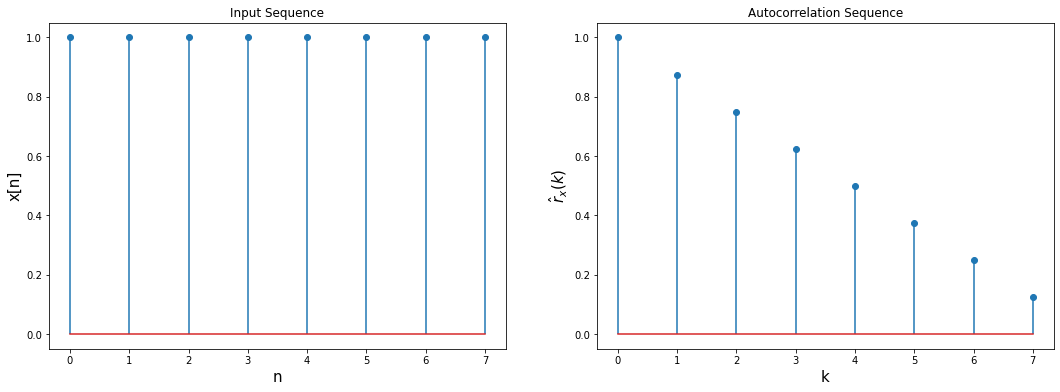

In [11]:
# Plotting the result
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.stem(q3_x)
plt.title('Input Sequence')
plt.xlabel('n',fontsize=15)
plt.ylabel('x[n]',fontsize=15)
plt.subplot(122)
plt.stem(q3_auto_sample)
plt.title('Autocorrelation Sequence')
plt.xlabel('k',fontsize=15)
plt.ylabel('$\hat r_{x}(k)$',fontsize=15)
plt.show()

### Q.4. 
#### (a) Generate N samples of zero mean with unit variance white Gaussian noise. Plot the histogram
#### (b) Estimate the first M lags of the autocorrelation sequence using the sample autocorrelation as
$$ \hat r_{x}(k) = \frac{1}{N} \sum_{n=0}^{N-1} x(n) x(n-k)$$
#### Determine that how close is your estimate to the true autocorrelation sequence $r_{x}(k) = δ(k)$?
#### (c) Segment your white noise sequence into ten different white noise sequences each having a length of M samples, and estimate the autocorrelation by averaging the sample autocorrelations of each subsequence, i.e.,
$$ \hat r_{x}(k) = \frac{1}{N} \sum_{m=0}^{9} \sum_{n=0}^{M-1} x(n+100m) x(n-k+100m), k=0,1,2...M-1$$
#### Compare your estimate to that in part (b)? Also, compare it to the true autocorrelation sequence rx(k)? Choose N = 1000 and M = 100.
#### Generate 10000 samples of a zero mean with unit variance white Gaussian noise sequence and estimate the first 100 lags of the autocorrelation sequence as in part (b). Plot the histogram of white Gaussian noise for 10000 samples. Compare your estimate to that in part (b)? What conclusions can you draw from these experiments?

In [12]:
# Given length of M=100 and N=1000
q4_N = 1000
q4_M = 100
np.random.seed(1)

# Defining white noise whose mean is 0 and standard deviation is 1
q4_white_gauss_noise = np.random.normal(0,1,q4_N)

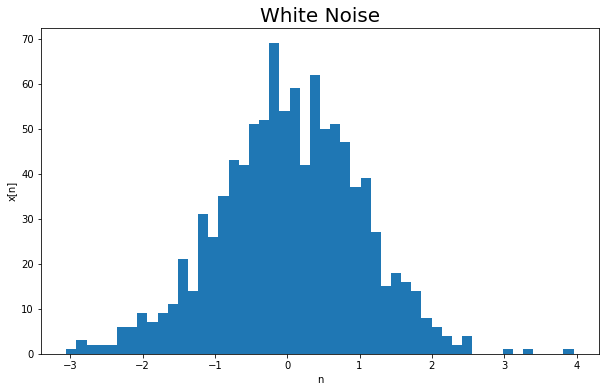

In [13]:
plt.figure(figsize=(10,6))
plt.hist(q4_white_gauss_noise,bins=50)
plt.title('White Noise',fontsize=20)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

In [14]:
# Calculating autocorrleation of white noise of first 100 delays with the function defined in Q3

q4_auto_corr = auto_corr(q4_white_gauss_noise,q4_M)

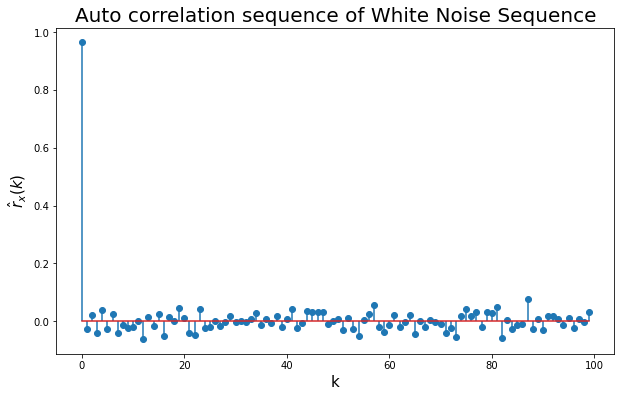

In [15]:
plt.figure(figsize=(10,6))
plt.stem(q4_auto_corr)
plt.title('Auto correlation sequence of White Noise Sequence',fontsize=20)
plt.xlabel('k',fontsize=15)
plt.ylabel('$\hat r_{x}(k)$',fontsize=15)
plt.show()

# Autocorrelation of white noise resemble a unit impulse function

In [16]:
# Calculating autocorrelation of white gaussian noise for 10 different sequence each divided in 100 segments

q4_segments = int(q4_N/q4_M)
q4_auto_corr_segment = np.zeros(q4_M)

for m in range(0,q4_segments):
    q4_temp = auto_corr(q4_white_gauss_noise[0+100*m:100+100*m],q4_M)
    q4_auto_corr_segment = q4_auto_corr_segment + q4_temp
q4_auto_corr_segment = q4_auto_corr_segment/q4_segments

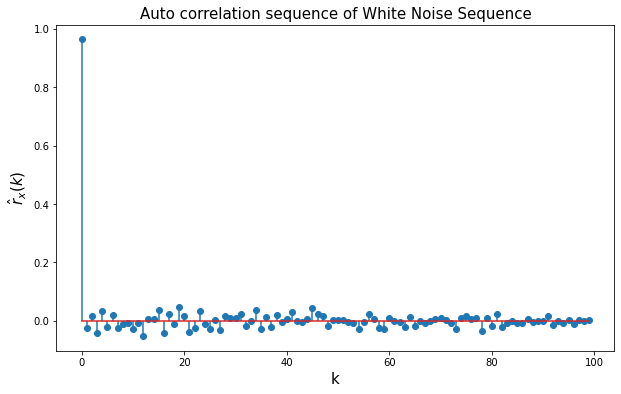

In [17]:
plt.figure(figsize=(10,6))
plt.stem(q4_auto_corr_segment)
plt.title('Auto correlation sequence of White Noise Sequence',fontsize=15)
plt.xlabel('k',fontsize=15)
plt.ylabel('$\hat r_{x}(k)$',fontsize=15)
plt.show()

# By averaging autocorrelation by dividing the sequence, the autocorrelation gets closer to unit impluse function

In [18]:
# Finding white noise for 10000 samples

q4_N2 = 10000

np.random.seed(2)

q4_white_gauss_noise2 = np.random.normal(0,1,q4_N2)

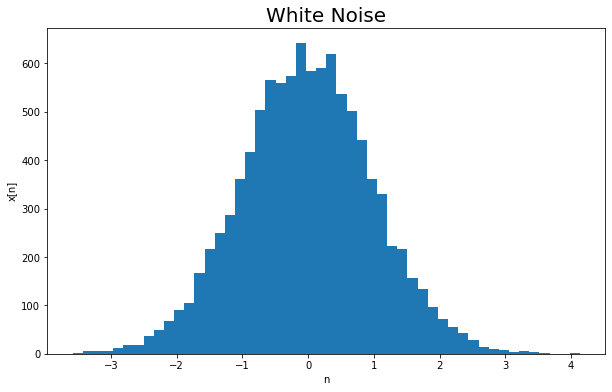

In [19]:
plt.figure(figsize=(10,6))
plt.hist(q4_white_gauss_noise2,bins=50)
plt.title('White Noise',fontsize=20)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

In [20]:
# Calculating autocorrelation for first 100 lags

q4_auto_corr2 = auto_corr(q4_white_gauss_noise2,q4_M)

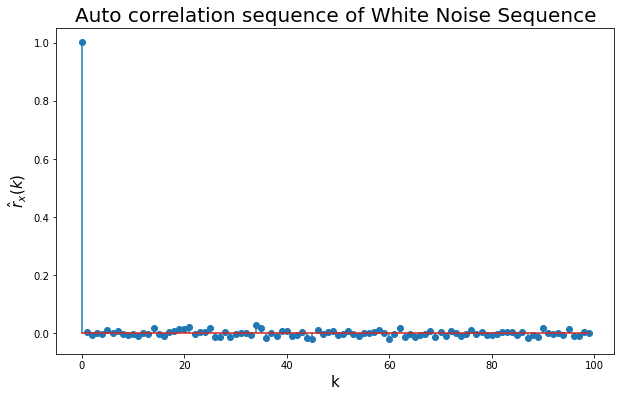

In [21]:
plt.figure(figsize=(10,6))
plt.stem(q4_auto_corr2)
plt.title('Auto correlation sequence of White Noise Sequence',fontsize=20)
plt.xlabel('k',fontsize=15)
plt.ylabel('$\hat r_{x}(k)$',fontsize=15)
plt.show()

# By increasing length of the sequence, the autocorrelation gets closer to impulse function

### Q.5.
#### Download the “seeds” dataset from https://archive.ics.uci.edu/ ml/machine-learning-databases/00236/seeds_dataset.txt. It consists of 7 features. More details about the dataset can be found at https://archive.ics.uci.edu/ml/datasets/seeds. Define two custom functions (one for correlation and other for covariance), where each function takes two features as input and returns the correlation or covariance between the features as output. Use these functions to calculate the correlation and covariance between every possible pair of features in the dataset and display the result in the form of table (You are not allowed to use any inbuilt functions). Compare your function results with the inbuilt functions and tabulate them.
#### Correlation coefficient is given by:
$$ r_{xy} = \frac {\sum_{i=1}^{n} (x_{i}-\hat x)(y_{i}-\hat y)}{\sqrt {\sum_{i=1}^{n} (x_{i}-\hat x)^2}\sqrt{{\sum_{i=1}^{n}(y_{i}-\hat y)^2}}} $$
#### Covariance is given by:
$$ Cov_{xy} = \frac {\sum_{i=1}^{n} (x_{i}-\hat x)(y_{i}-\hat y)}{N-1} $$

In [22]:
# Function to find correlation cofficient

def correlation_coff(x,y):
    x_copy=np.array(x)
    y_copy=np.array(y)
    x_mean = np.mean(x_copy)
    y_mean = np.mean(y_copy)
    
    len_seq = min(len(x_copy),len(y_copy))
    
    num=0
    den1=0
    den2=0
    
    for i in range(0,len_seq):
        num = num+(x_copy[i]-x_mean)*(y_copy[i]-y_mean)
        den1 = den1 + np.power((x_copy[i]-x_mean),2)
        den2 = den2 + np.power((y_copy[i]-y_mean),2)
    
    corr_coff = num/np.sqrt(den1*den2)
    return corr_coff

# Function to find covariance cofficient
def covariance_coff(x,y):
    x_copy=np.array(x)
    y_copy=np.array(y)
    x_mean = np.mean(x_copy)
    y_mean = np.mean(y_copy)
    
    len_seq = min(len(x_copy),len(y_copy))
    
    num = 0
    for i in range(0,len_seq):
        num = num+(x_copy[i]-x_mean)*(y_copy[i]-y_mean)
    
    covar_coff = num/(len_seq-1)
    return covar_coff

In [23]:
# Reading seeds file from given url
q5_seed = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt",sep="\s+",header=None)

In [24]:
q5_seed.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [25]:
# Defining an array whose length is equal to number of features

q5_len = len(q5_seed.columns)
q5_seed_corr = np.zeros((q5_len,q5_len))
q5_seed_cov = np.zeros((q5_len,q5_len))

In [26]:
for i in (range(q5_len)):
    for j in (range(q5_len)):
        q5_seed_corr[i][j] = correlation_coff(q5_seed[i],q5_seed[j])
        q5_seed_cov[i][j] = covariance_coff(q5_seed[i],q5_seed[j])

In [27]:
print(f'The Correlation coefficient between each pair of features of seeds data is tabulated below:')
pd.DataFrame(q5_seed_corr)

The Correlation coefficient between each pair of features of seeds data is tabulated below:


,0,1,2,3,4,5,6,7
0,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
1,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
2,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
3,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
4,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
5,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
6,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
7,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


In [28]:
print(f'The Covariance coefficient between each pair of features of seeds data is tabulated below:')
pd.DataFrame(q5_seed_cov)

The Covariance coefficient between each pair of features of seeds data is tabulated below:


,0,1,2,3,4,5,6,7
0,8.466351,3.778443,0.041823,1.224704,1.066911,-1.004356,1.235133,-0.824115
1,3.778443,1.705528,0.016332,0.562666,0.466065,-0.426766,0.571753,-0.350478
2,0.041823,0.016332,0.000558,0.003852,0.006798,-0.011777,0.002634,-0.010269
3,1.224704,0.562666,0.003852,0.196305,0.143992,-0.114290,0.203125,-0.093292
4,1.066911,0.466065,0.006798,0.143992,0.142668,-0.146543,0.139068,-0.130909
5,-1.004356,-0.426766,-0.011777,-0.114290,-0.146543,2.260684,-0.008187,0.710382
6,1.235133,0.571753,0.002634,0.203125,0.139068,-0.008187,0.241553,0.009775
7,-0.824115,-0.350478,-0.010269,-0.093292,-0.130909,0.710382,0.009775,0.669856


In [29]:
# Using in built function
print(f'The Correlation coefficient using in built function:')
q5_seed.corr()

The Correlation coefficient using in built function:


,0,1,2,3,4,5,6,7
0,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
1,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
2,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
3,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
4,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
5,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
6,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
7,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


In [30]:
# Using in built function
print(f'The Covariance coefficient using in built function:')
q5_seed.cov()

The Covariance coefficient using in built function:


,0,1,2,3,4,5,6,7
0,8.466351,3.778443,0.041823,1.224704,1.066911,-1.004356,1.235133,-0.824115
1,3.778443,1.705528,0.016332,0.562666,0.466065,-0.426766,0.571753,-0.350478
2,0.041823,0.016332,0.000558,0.003852,0.006798,-0.011777,0.002634,-0.010269
3,1.224704,0.562666,0.003852,0.196305,0.143992,-0.114290,0.203125,-0.093292
4,1.066911,0.466065,0.006798,0.143992,0.142668,-0.146543,0.139068,-0.130909
5,-1.004356,-0.426766,-0.011777,-0.114290,-0.146543,2.260684,-0.008187,0.710382
6,1.235133,0.571753,0.002634,0.203125,0.139068,-0.008187,0.241553,0.009775
7,-0.824115,-0.350478,-0.010269,-0.093292,-0.130909,0.710382,0.009775,0.669856


In [31]:
# Comparison between result using custom function and in-built function
print(f'The difference between result using custom function and inbuilt function is tabulated below:')
pd.DataFrame(q5_seed_corr) - q5_seed.corr()

The difference between result using custom function and inbuilt function is tabulated below:


,0,1,2,3,4,5,6,7
0,0.000000e+00,2.220446e-16,6.217249e-15,5.551115e-16,-4.440892e-16,4.718448e-16,-7.771561e-16,1.054712e-15
1,2.220446e-16,0.000000e+00,6.328271e-15,-2.220446e-16,5.551115e-16,1.332268e-15,1.443290e-15,3.219647e-15
2,6.217249e-15,6.328271e-15,0.000000e+00,7.216450e-15,5.440093e-15,-2.275957e-15,6.106227e-15,-2.886580e-15
3,5.551115e-16,-2.220446e-16,7.216450e-15,0.000000e+00,-2.220446e-16,5.551115e-17,-2.109424e-15,1.110223e-16
4,-4.440892e-16,5.551115e-16,5.440093e-15,-2.220446e-16,0.000000e+00,-1.554312e-15,-1.665335e-15,-2.720046e-15
5,4.718448e-16,1.332268e-15,-2.275957e-15,5.551115e-17,-1.554312e-15,0.000000e+00,9.141993e-16,0.000000e+00
6,-7.771561e-16,1.443290e-15,6.106227e-15,-2.109424e-15,-1.665335e-15,9.141993e-16,0.000000e+00,2.154527e-15
7,1.054712e-15,3.219647e-15,-2.886580e-15,1.110223e-16,-2.720046e-15,0.000000e+00,2.154527e-15,0.000000e+00


In [32]:
# Comparison between result using custom function and in-built function
print(f'The difference between result using custom function and inbuilt function is tabulated below:')
pd.DataFrame(q5_seed_cov) - q5_seed.cov()

The difference between result using custom function and inbuilt function is tabulated below:


,0,1,2,3,4,5,6,7
0,-1.776357e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.220446e-16,-1.110223e-16
1,0.000000e+00,0.000000e+00,3.469447e-18,0.000000e+00,-1.110223e-16,-5.551115e-17,1.110223e-16,0.000000e+00
2,0.000000e+00,3.469447e-18,1.084202e-19,-4.336809e-19,8.673617e-19,1.734723e-18,4.336809e-19,-1.734723e-18
3,0.000000e+00,0.000000e+00,-4.336809e-19,2.775558e-17,0.000000e+00,-2.775558e-17,2.775558e-17,-1.387779e-17
4,0.000000e+00,-1.110223e-16,8.673617e-19,0.000000e+00,-2.775558e-17,-2.775558e-17,0.000000e+00,0.000000e+00
5,0.000000e+00,-5.551115e-17,1.734723e-18,-2.775558e-17,-2.775558e-17,4.440892e-16,1.734723e-17,0.000000e+00
6,-2.220446e-16,1.110223e-16,4.336809e-19,2.775558e-17,0.000000e+00,1.734723e-17,0.000000e+00,0.000000e+00
7,-1.110223e-16,0.000000e+00,-1.734723e-18,-1.387779e-17,0.000000e+00,0.000000e+00,0.000000e+00,1.110223e-16


### Q.6.
#### Consider a random process X(t) = 5 sin (2t + ϕ1) + 6 cos (3t + ϕ2), where ϕ1 and ϕ2 are uniformly distributed in [−π, π] and [0, 2π], respectively, and ϕ1 and ϕ2 are independent of each other.
#### (a) Determine if X(t) is a Wide Sense Stationary (WSS) Process . If yes, plot X(t) and its auto-correlation sequence.
#### (b) If M(t) is a WSS process and M(t) is independent of ϕ1 and ϕ2, check whether the product M(t)X(t) is a WSS or not. Provide your explanation on a paper and share the screenshot of the same.

In [33]:
# Defining x(t)
q6_t = np.linspace(0,5,501)
q6_rv1 = np.random.uniform(-math.pi,math.pi,501)
q6_rv2 = np.random.uniform(0,2*math.pi,501)

q6_x = 5*np.sin(2*q6_t+q6_rv1) + 6*np.cos(3*q6_t+q6_rv2)


# Calculating the auto-correlation sequence of x(t) for 100 lags
q6_auto_corr = auto_corr(q6_x,100)

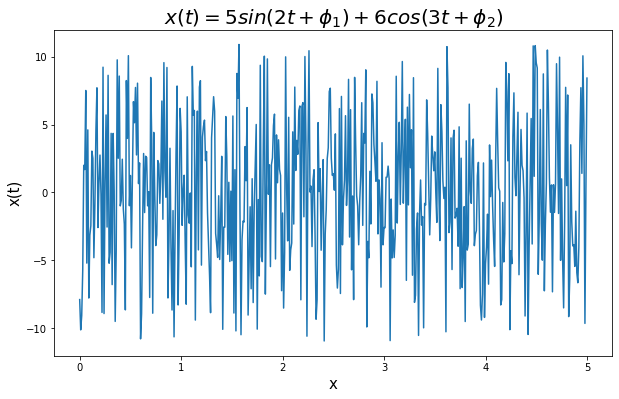

In [34]:
plt.figure(figsize=(10,6))
plt.plot(q6_t,q6_x)
plt.xlabel('x',fontsize=15)
plt.ylabel('x(t)',fontsize=15)
plt.title('$x(t)=5sin(2t+\phi_{1})+6cos(3t+\phi_{2})$',fontsize=20)
plt.show()

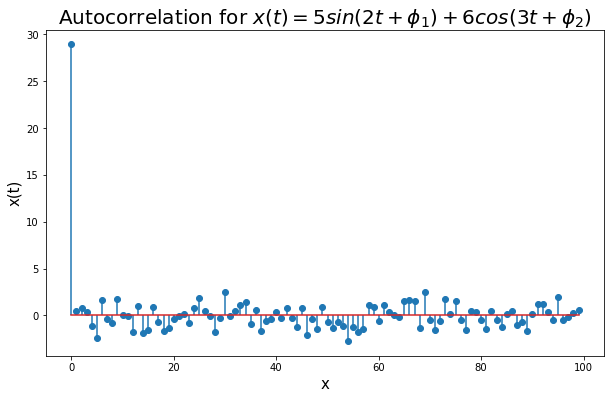

In [35]:
plt.figure(figsize=(10,6))
plt.stem(q6_auto_corr)
plt.xlabel('x',fontsize=15)
plt.ylabel('x(t)',fontsize=15)
plt.title('Autocorrelation for $x(t)=5sin(2t+\phi_{1})+6cos(3t+\phi_{2})$',fontsize=20)
plt.show()

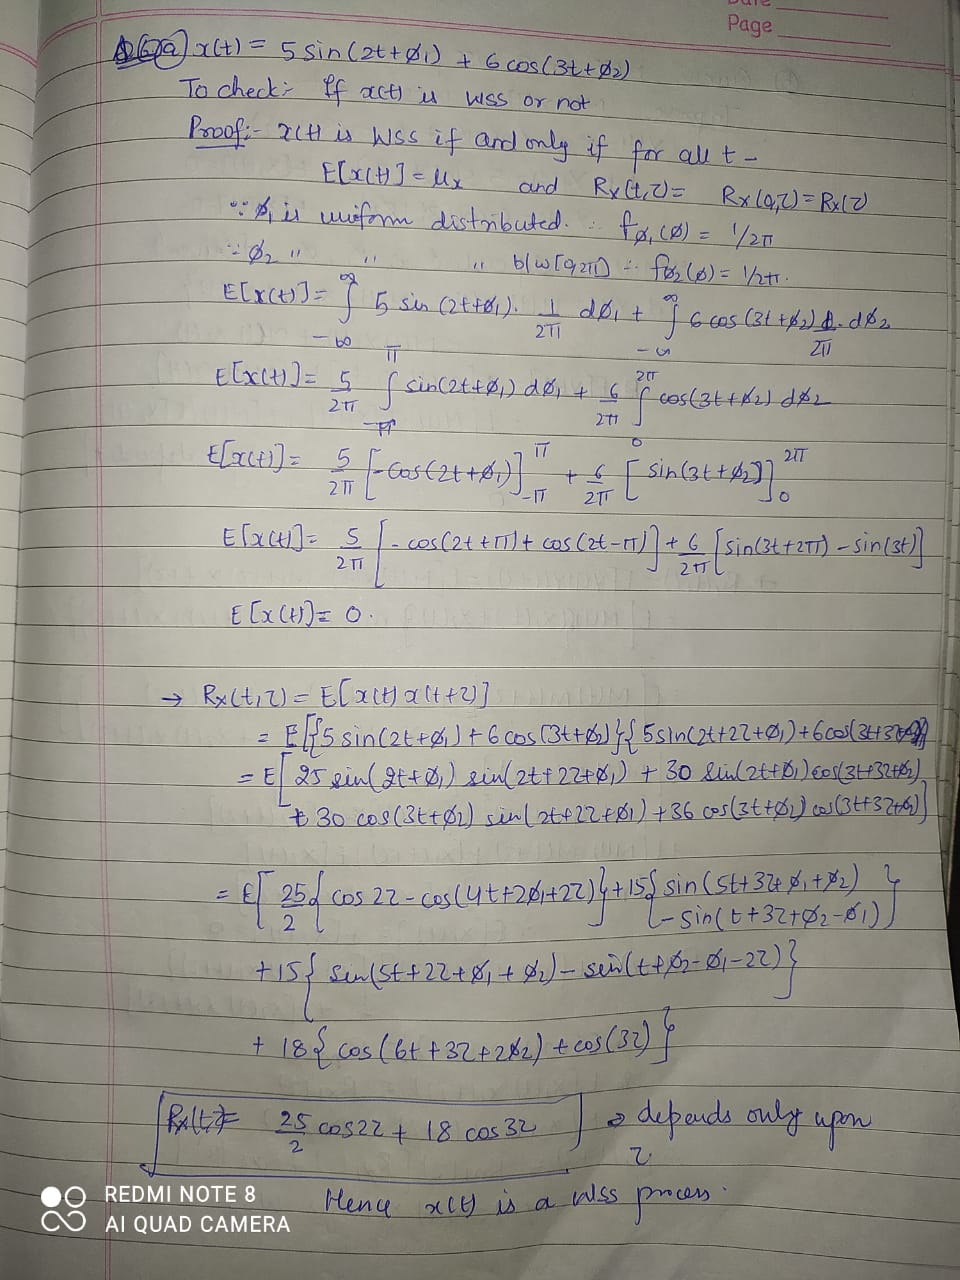

In [36]:
Image(filename='Q6a.jpeg',width=400, height=200)

# Checking whether x(t) is WSS or not

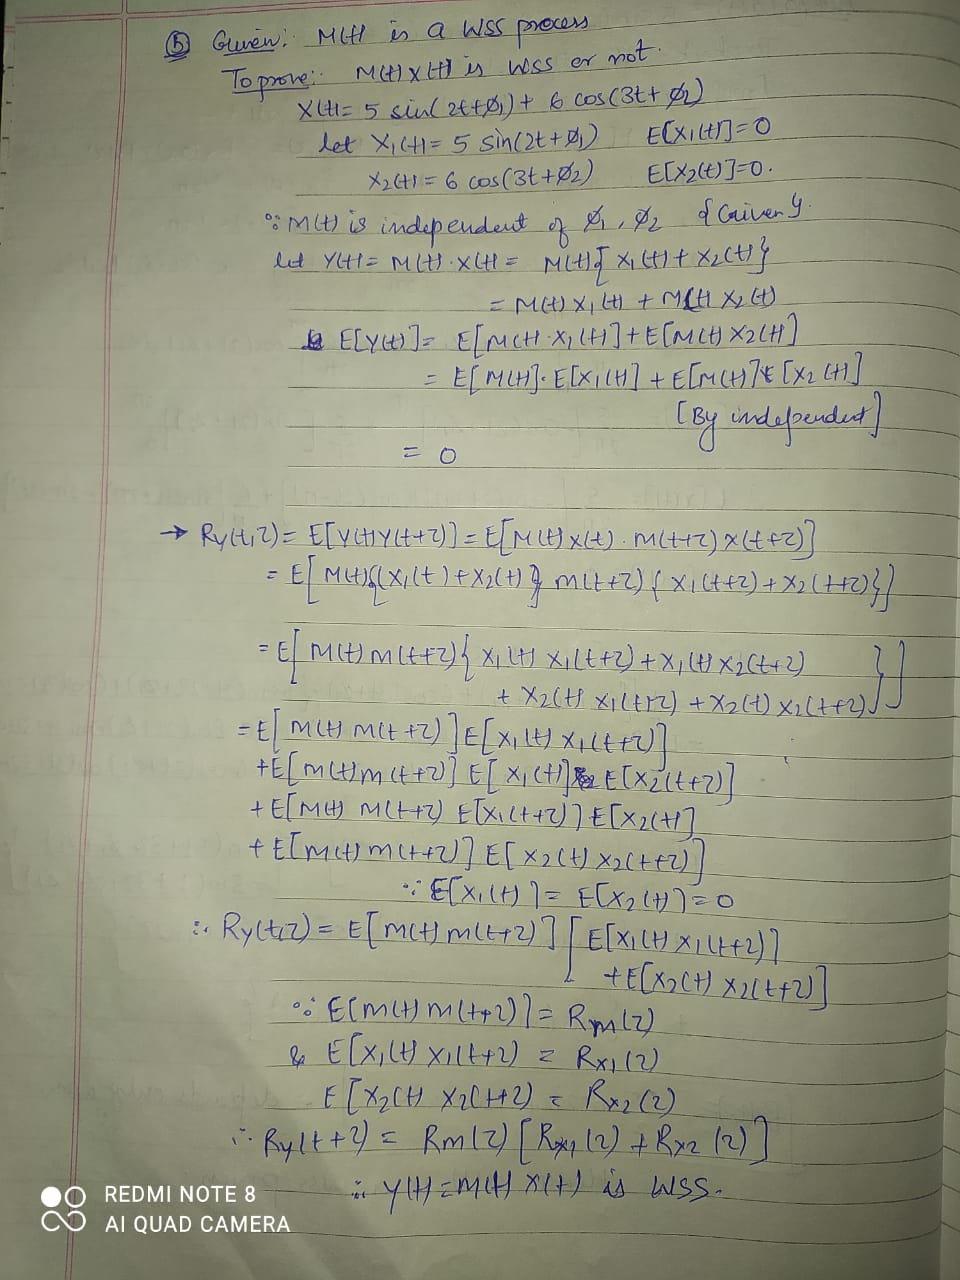

In [37]:
Image(filename='Q6b.jpeg',width=400, height=200)

# Checking whether M(t)X(t) is WSS or not

### Q.7.
#### (a) Draw out a sample for chi-squared distribution with degree of freedom 2 with size 2 × 3.
#### (b) Visualize chi-square distribution with degree of freedom = [1, 4, 8, 12] for a size of 1000.

In [38]:
# Using inbuilt chi square function

q7_a_chi_sample = np.random.chisquare(df=2,size=(2,3))

print(f'The sample drawm from chi squared distribution is:\n')
pd.DataFrame(q7_a_chi_sample)

The sample drawm from chi squared distribution is:



,0,1,2
0,3.069396,5.788202,4.592533
1,0.083852,3.531276,3.431629


In [39]:
q7_b_chi_dist1 = np.random.chisquare(df=1,size=1000)
q7_b_chi_dist2 = np.random.chisquare(df=4,size=1000)
q7_b_chi_dist3 = np.random.chisquare(df=8,size=1000)
q7_b_chi_dist4 = np.random.chisquare(df=12,size=1000)

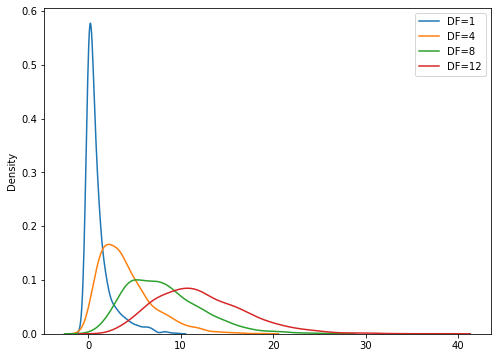

In [40]:
plt.figure(figsize=(8,6))
sns.kdeplot(q7_b_chi_dist1,label='DF=1')
sns.kdeplot(q7_b_chi_dist2,label='DF=4')
sns.kdeplot(q7_b_chi_dist3,label='DF=8')
sns.kdeplot(q7_b_chi_dist4,label='DF=12')
plt.legend()
plt.show()

### Q.8.
#### (a) Draw out a sample for exponential distribution with 2.0 scale with 2x3 size
#### (b) Visualize exponential distribution for a size of 1000.

In [41]:
# Using inbuilt exponential function
q8_a_exp_sample = np.random.exponential(scale=2,size=(2,3))

print(f'The sample drawm from Exponential distribution is:\n')
pd.DataFrame(q8_a_exp_sample)

The sample drawm from Exponential distribution is:



,0,1,2
0,1.661900,1.497657,1.613753
1,7.413628,2.577512,1.516469


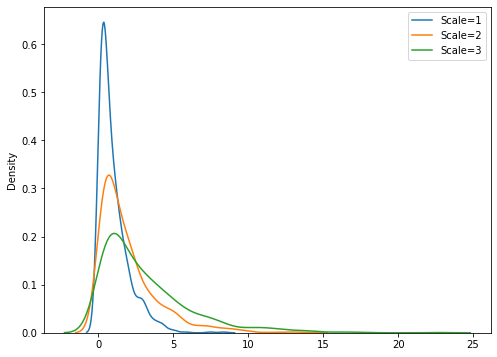

In [42]:
q8_b_exp_dist1 = np.random.exponential(size=1000)
q8_b_exp_dist2 = np.random.exponential(scale=2,size=1000)
q8_b_exp_dist3 = np.random.exponential(scale=3,size=1000)

plt.figure(figsize=(8,6))
sns.kdeplot(q8_b_exp_dist1,label='Scale=1')
sns.kdeplot(q8_b_exp_dist2,label='Scale=2')
sns.kdeplot(q8_b_exp_dist3,label='Scale=3')
plt.legend()
plt.show()

### Q.9.
#### (a) Generate a 1-D array containing 100 values, where each value has to be 2, 4, 6 or 8. The probability for the value to be 2, 4, 6, and 8 is set to be 0.1, 0.3, 0.6, 0, respectively.
#### (b) For the same example as (a), return a 2-D array with 3 rows, each containing 5 values.

In [43]:
np.random.seed(10)
q9_array = np.array([2,4,6,8])
q9_array_val = np.random.choice(q9_array,size=100,p=[0.1,0.3,0.6,0.0])

In [44]:
q9_array_val

array([6, 2, 6, 6, 6, 4, 4, 6, 4, 2, 6, 6, 2, 6, 6, 6, 6, 4, 6, 6, 6, 4,
       4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 2, 4, 4, 6, 2, 6, 6, 6, 4, 6,
       4, 6, 4, 6, 4, 4, 4, 2, 6, 4, 4, 6, 6, 6, 6, 4, 6, 6, 6, 6, 2, 4,
       2, 4, 4, 6, 2, 6, 4, 6, 4, 2, 6, 6, 6, 6, 6, 6, 6, 4, 4, 2, 4, 4,
       6, 6, 6, 4, 2, 6, 4, 6, 6, 6, 4, 6])

In [45]:
np.random.seed(10)
q9_array = np.array([2,4,6,8])
q9_array_val2 = np.random.choice(q9_array,size=(3,5),p=[0.1,0.3,0.6,0.0])

In [46]:
q9_array_val2

array([[6, 2, 6, 6, 6],
       [4, 4, 6, 4, 2],
       [6, 6, 2, 6, 6]])

### Q.10.
#### (a) Generate central chi-squared distributed random variables with degrees of freedom k = 1, 2, 3, 4, 5 and plot the PDFs. Write your own function, where the function takes input as degrees of freedom and returns output has chi-sqaured distributed random variable.
#### (b) Given the degrees of freedom k and non-centrality parameter λ, write a function to generate a sequence of random numbers that are non-central chi-squared distributed. Plot the PDFs for non-central chisquared random variables for two different degrees of freedom k = 2 and k = 4, each with three different non-centrality parameters λ = 1, 2, 3.

##### The pdf of a central chi squared distribution is given by
$$ f(x) = \frac{1}{2^{n/2} \Gamma(n/2)} x^{n/2-1} e^{-x/2}$$

##### The pdf of a non-central chi squared distribution is given by
$$ g(x) = \sum_{k=0}^{\infty} e^{-\lambda/2} \frac{(\lambda/2)^{k}}{k!} f_{n+2k}(x)$$  
##### where $ f_{k}(x) $ represent pdf of chi squared distribution with k degrees of freedom

In [47]:
# Function to calcuate chi square distribution as per formula defined above
def central_chi_sq(n):
    y_chi = []
    x_chi = np.linspace(0.01,10,1000)
    for i in x_chi:
        temp_num = np.power(i,(n/2-1)) * np.exp(-i/2)
        temp_den = np.power(2,n/2) * math.gamma(n/2)
        y_chi.append(temp_num/temp_den)
    
    return y_chi

In [48]:
q10_x_var = np.linspace(0.01,10,1000)

q10_chi_1 = central_chi_sq(1)
q10_chi_2 = central_chi_sq(2)
q10_chi_3 = central_chi_sq(3)
q10_chi_4 = central_chi_sq(4)
q10_chi_5 = central_chi_sq(5)

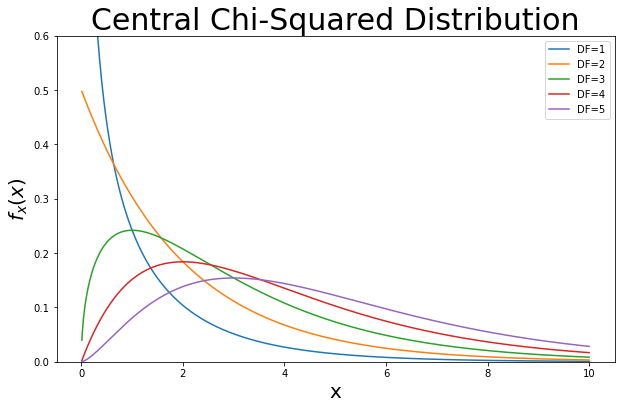

In [54]:
plt.figure(figsize=(10,6))
plt.plot(q10_x_var,q10_chi_1,label='DF=1')
plt.plot(q10_x_var,q10_chi_2,label='DF=2')
plt.plot(q10_x_var,q10_chi_3,label='DF=3')
plt.plot(q10_x_var,q10_chi_4,label='DF=4')
plt.plot(q10_x_var,q10_chi_5,label='DF=5')
plt.xlabel('x',fontsize=20)
plt.ylabel('$f_{x}(x)$',fontsize=20)
plt.title('Central Chi-Squared Distribution',fontsize=30)
plt.ylim(0,0.6)
plt.legend()
plt.show()

In [50]:
# Function to calculate non central chi squared distribution using formula above and taking k in range(0,100)
def non_central_chi_square(n,lam):
    y_non_cen = 0
    temp_var1 = 0
    temp_var2 = 0
    
    for k in range(0,101):
        temp_var1 = np.array(central_chi_sq(n+2*k))
        temp_var2 = np.exp(-lam/2) * np.power(lam/2,k) / math.factorial(k)
        y_non_cen = y_non_cen + temp_var1*temp_var2
    
    return y_non_cen

In [51]:
q10_non_chi1 = non_central_chi_square(2,1)
q10_non_chi2 = non_central_chi_square(2,2)
q10_non_chi3 = non_central_chi_square(2,3)
q10_non_chi4 = non_central_chi_square(4,1)
q10_non_chi5 = non_central_chi_square(4,2)
q10_non_chi6 = non_central_chi_square(4,3)

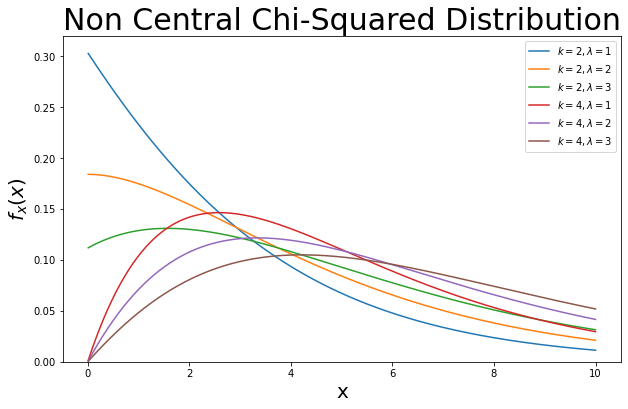

In [53]:
plt.figure(figsize=(10,6))
plt.plot(q10_x_var,q10_non_chi1,label='$k=2,\lambda=1$')
plt.plot(q10_x_var,q10_non_chi2,label='$k=2,\lambda=2$')
plt.plot(q10_x_var,q10_non_chi3,label='$k=2,\lambda=3$')
plt.plot(q10_x_var,q10_non_chi4,label='$k=4,\lambda=1$')
plt.plot(q10_x_var,q10_non_chi5,label='$k=4,\lambda=2$')
plt.plot(q10_x_var,q10_non_chi6,label='$k=4,\lambda=3$')
plt.xlabel('x',fontsize=20)
plt.ylabel('$f_{x}(x)$',fontsize=20)
plt.title('Non Central Chi-Squared Distribution',fontsize=30)
plt.ylim(0,0.32)
plt.legend()
plt.show()